In [415]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Simple manual example

In [416]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=7, n_clusters_per_class=1, n_classes=4)
# summarize the dataset
print(X.shape, y.shape)

(100, 2) (100,)


In [417]:
X

array([[ 0.50123342, -1.06674029],
       [ 1.06816726, -0.42710861],
       [ 0.1934072 ,  0.15445578],
       [-2.85230985,  1.25644664],
       [-0.75965463,  0.7708333 ],
       [-1.20177741,  2.23544065],
       [-1.02194087, -1.19793306],
       [-1.14270681,  0.153492  ],
       [-0.68461335, -1.45615151],
       [-0.87337851, -0.80487173],
       [-1.06447541,  1.64974192],
       [ 2.15979316,  0.94097775],
       [ 0.48276624, -1.3497746 ],
       [ 2.20445573,  1.10781034],
       [ 1.40290893, -0.36826143],
       [ 1.07248401, -0.67202902],
       [-1.15534494, -1.23737757],
       [-2.43330681,  0.89300976],
       [ 0.08378874, -2.42746188],
       [-1.58224886, -0.10516127],
       [-1.25136663,  1.94676764],
       [ 0.31070809,  0.6040343 ],
       [ 0.62533818, -1.22330994],
       [ 0.97158881, -0.57199973],
       [ 0.12974362, -2.41671501],
       [ 0.67870526,  0.38553337],
       [ 0.19604007, -2.45798824],
       [-1.32246921, -0.97258578],
       [ 1.06782679,

In [418]:
y

array([1, 1, 3, 0, 2, 2, 0, 2, 0, 0, 2, 3, 1, 3, 1, 1, 2, 0, 0, 0, 2, 3,
       1, 1, 0, 3, 0, 0, 1, 2, 1, 1, 0, 2, 3, 0, 2, 0, 1, 3, 3, 3, 1, 1,
       0, 0, 2, 0, 3, 3, 3, 3, 2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 1, 3, 1, 0,
       2, 2, 3, 0, 1, 2, 0, 1, 2, 3, 0, 2, 3, 0, 2, 0, 0, 2, 0, 1, 3, 2,
       3, 1, 2, 3, 1, 1, 2, 2, 3, 0, 3, 1])

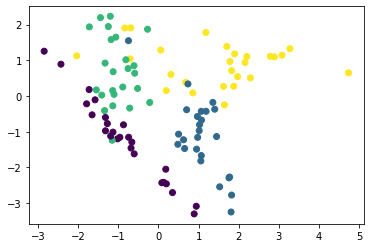

In [419]:
plt.scatter(*zip(*X), c=y)

In [420]:
list(map(str, set(y)))

['0', '1', '2', '3']

In [421]:
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)

In [422]:
model.classes_

array([0, 1, 2, 3])

In [423]:
model.coef_

array([[-2.08368694, -2.13660667],
       [ 0.58485483, -0.7847548 ],
       [-1.07591148,  0.47339944],
       [ 2.43433378,  2.37201732]])

In [424]:
model.decision_function

<bound method LinearClassifierMixin.decision_function of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)>

In [425]:
model.explained_variance_ratio_

array([0.78603909, 0.21396091])

In [426]:
model.get_params

<bound method BaseEstimator.get_params of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)>

In [427]:
model.intercept_

array([-3.56828696, -2.26214627, -2.00647434, -4.1211685 ])

In [428]:
model.means_

array([[-0.84340513, -1.20405998],
       [ 1.04978306, -1.13570045],
       [-1.02481219,  0.69734636],
       [ 1.41412839,  0.89480044]])

In [429]:
model.n_components

In [430]:
model.priors

In [431]:
model.scalings_

array([[-1.04398564,  0.54381225],
       [-0.98771204, -0.67843654]])

In [432]:
model.shrinkage

In [433]:
model.solver

'svd'

In [434]:
model.store_covariance

False

In [435]:
model.tol

0.0001

In [436]:
model.xbar_

array([ 0.17331294, -0.18492887])

In [437]:
#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2

target_names = list(map(str,set(y)))
target_names

['0', '1', '2', '3']

<Figure size 432x288 with 0 Axes>

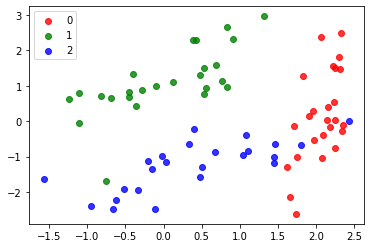

In [438]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [439]:
X, y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0, random_state=7, n_clusters_per_class=1, n_classes=3)

#predict which class the new observation belongs to
model.predict(X)


array([2, 0, 3, 3, 1, 0, 0, 1, 0, 0])

In [440]:
y

array([1, 0, 1, 0, 0, 2, 2, 0, 1, 2])

In [441]:
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx1, xx2 = np.meshgrid(x1, x2)
yPred = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
yPred = yPred.reshape(xx1.shape)

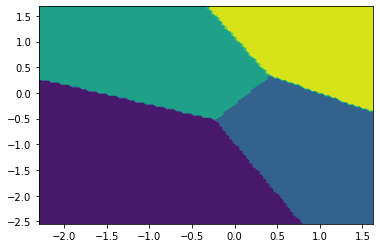

In [442]:
plt.contourf(xx1, xx2, yPred)

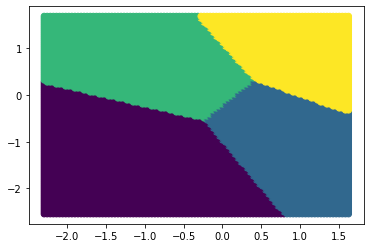

In [443]:
plt.scatter(xx1, xx2, c=yPred)

In [444]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
x = [[-1.75187042,  1.5934882 ],
       [-0.04888092, -2.54533128],
       [ 0.58364067,  1.68370907],
       [ 1.62840646, -0.0605028 ],
       [ 0.84789182, -1.22549824],
       [-1.102274  , -1.22591292],
       [-1.44706688, -2.13231864],
       [ 0.79838203, -1.28657245],
       [-2.29799401,  0.23027453],
       [-1.15511481, -1.3879785 ]]

y = [1, 0, 1, 0, 0, 2, 2, 0, 1, 2]
model = LinearDiscriminantAnalysis()
model.fit(X, y)

X, y = make_classification(n_samples=4, n_features=2, n_informative=2, n_redundant=0, random_state=7, n_clusters_per_class=1, n_classes=3)

#predict which class the new observation belongs to
model.predict(X)

array([0, 1, 1, 1])

In [445]:
y

array([1, 0, 0, 2])

In [446]:
model.classes_

array([0, 1, 2])